In [3]:
import librosa
from librosa import display
import sklearn as sk
import matplotlib.pyplot as plt
from playsound import playsound # if playsound fails to install on mac, try 'pip install pyobjc' first
import numpy as np

In [38]:
def spectrogram(file_name, xlimit=None):
    y, sr = librosa.load(file_name)
    y = librosa.amplitude_to_db(np.abs(librosa.stft(y)), ref=np.max)
    plt.title(file_name)
    librosa.display.specshow(y, x_axis='time', y_axis='linear');
    plt.colorbar();
    if xlimit:
        plt.xlim(0, xlimit)
    plt.show()

In [5]:
def next_pow2(x):
    if x == 0:
        return 1
    else:
        n = 2;
        while n < x:
            n = n*2
        return n 

In [6]:
def deconv(combined_filename, audioir_filename, ir = True):
    y, sry = librosa.load(combined_filename)
    x, srx = librosa.load(audioir_filename) # used var name x, but can be x or h (original audio or impulse response)

    scale = 4

    N = next_pow2(y.shape[0])   
    ft_y = np.fft.rfft(y, N)
    ft_x = np.fft.rfft(x, N)

    recovered = np.fft.irfft(ft_y * np.conj(ft_x)/(abs(ft_x)**2))

    recovered = recovered * scale
    
    if ir:
        librosa.output.write_wav("recovered_ir.wav", recovered, srx)
        return "recovered_ir.wav"
    else:
        librosa.output.write_wav("recovered_audio.wav", recovered, srx)
        return "recovered_audio.wav"

In [16]:
def conv(audio_filename, ir_filename):
    x, srx = librosa.load(audio_filename) # original audio
    h, srh = librosa.load(ir_filename) # impulse response

    if srx != srh:
        sys.exit('sr must be the same in both files')

    N = next_pow2(max(x.shape[0],h.shape[0]))
    scale = 0.3

    y = np.fft.irfft(np.fft.rfft(x, N) * np.fft.rfft(h, N))
    y *= scale
    
    librosa.output.write_wav("combined.wav", y, srx)
    return "combined.wav", y.shape[0] - x.shape[0]

In [17]:
impulse_response = "Philips_mono.wav"#"Concertgebouw-m.wav"
audio_file = 'anechoic1.wav'#"Beethoven_Symph7.wav"
combined, diff = conv(audio_file, impulse_response)
re_ir = deconv(combined, audio_file)
re_aud = deconv(combined, impulse_response, ir = False)

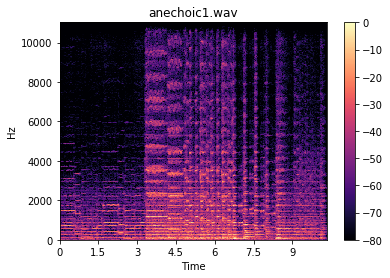

In [46]:
spectrogram(audio_file)

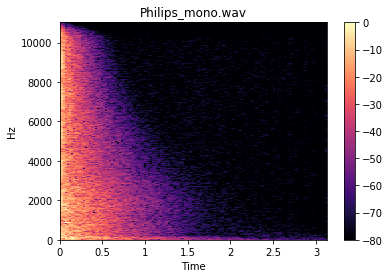

In [11]:
spectrogram(impulse_response)

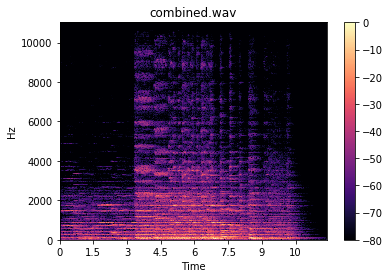

In [12]:
spectrogram(combined)

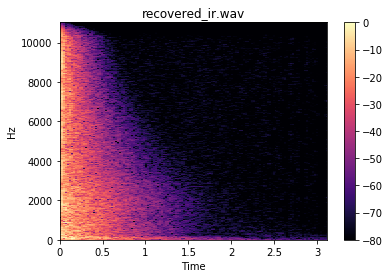

In [44]:
ir = librosa.load(impulse_response) # scale the spectrogram to the length of the original impulse response, this helps with comparison
ir_length = ir[0].shape[0]/ir[1]
spectrogram(re_ir, xlimit=ir_length)

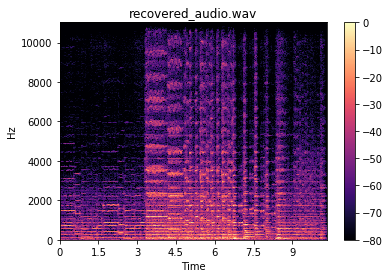

In [45]:
aud = librosa.load(audio_file) # scale the spectrogram to the length of the original audio, this helps with comparison
aud_length = aud[0].shape[0]/aud[1]
spectrogram(re_aud, xlimit = aud_length)

In [ ]:
playsound(impulse_response) #using shorter audio files works better, bc the playsound module has no pause button
#playsound(re_ir)
#playsound(re_aud)